<a href="https://colab.research.google.com/github/Estrellas-857/IDS703NLP_Final_Project/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Overview of the data
data.describe()
duplicates = data[data.duplicated(keep=False)]

duplicates.sort_values(by='review')

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative
...,...,...
47876,this movie sucks. did anyone notice that the e...,negative
44122,"well, the writing was very sloppy, the directi...",negative
23056,"well, the writing was very sloppy, the directi...",negative
10163,"when I first heard about this movie, I noticed...",positive


In [ ]:
#sentiment count
print("Total sentiments:\n",data['sentiment'].value_counts())

Total sentiments:
 positive    25000
negative    25000
Name: sentiment, dtype: int64


In [ ]:
test_review = data['review'][1]

# Data Cleaning

In [ ]:
# Expand the reviews x is aninput string of any length. Convert all the words to lower case
# reference: https://github.com/saugatapaul1010/Amazon-Fine-Food-Reviews-Analysis
def decontracted(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x



In [ ]:
import re
# Remove html
def remove_html(text):
  '''clean the text (remove html and urls)'''
  reg = re.compile('<.*?>') # remove html
  cleaned_text = reg.sub('', text)
  return cleaned_text

  #Remove URL from sentences.
def remove_URL(text):
    text = re.sub(r"http\S+", " ", text)
    cleaned_text = re.sub(r"www.\S+", " ", text)
    return (cleaned_text)


In [ ]:
# Remove punctuations
def remove_pun(text):
    '''Remove punctuations, except those that end a sentence'''
    cleaned_text = re.sub(r'(?<=[^.!?])\s+', ' ', re.sub('[^a-zA-Z.!?]', ' ', text))
    return cleaned_text.strip()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
tokenizer=ToktokTokenizer()


# construct the set of stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
print(stop_words)

# remove useful words from stopwords
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

stop_words  = stop_words  - excluding


def remove_stop(text):
  sentences = sent_tokenize(text)
  filtered_sens = []
  for sen in sentences:
    filtered_sentence = []
    word_tokens = tokenizer.tokenize(sen)
    end = word_tokens[-1] # the ending puncuation
    for w in word_tokens[:-1]:
      if w not in stop_words:
        filtered_sentence.append(w)
    filtered_sentence = ' '.join(filtered_sentence)
    filtered_sentence = filtered_sentence + end
    filtered_sens.append(filtered_sentence)
  filtered_sens = ' '.join(filtered_sens)
  return filtered_sens





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'i', 'at', "didn't", 'not', 'ain', 'she', 'nor', 'that', 'hadn', 'mightn', 'your', 'now', 'those', 'or', 'there', 't', 'we', 'me', 'under', 'needn', 'her', 'up', 'hers', 'hasn', 'each', 'to', 'because', 'a', 'down', "haven't", 'their', 'you', 'they', "it's", 'only', 'don', 'o', 'should', 'them', 'once', 'no', 'and', 'with', 'more', "aren't", "won't", 'through', 'why', "weren't", 'an', 'couldn', 'haven', 'weren', 'such', 'our', 'd', 'y', 'again', 's', 'wouldn', "shouldn't", 'doesn', "hasn't", 'below', 'ours', 'he', "mustn't", 'where', 'shan', 'been', "couldn't", "should've", "you've", 'from', "mightn't", 'the', 'until', 've', 'further', 'are', 'too', 'were', 'all', "wouldn't", "she's", 'on', 'same', 'by', 'other', 'him', 'than', "needn't", "hadn't", 'is', 'out', 'any', 'have', 'mustn', 'was', 'so', 'into', 'but', 'during', 'off', 'shouldn', 'won', 'themselves', 'my', 'above', 'some', 'ourselves', "you're", 'herself', 'isn', 'am', 'having', 'yourself', 'after', "you'd", 'about', "you'll

In [ ]:
def cleaned_text(text):
    text = decontracted(text)
    text = remove_html(text)
    text = remove_URL(text)
    text = remove_pun(text)
    text = remove_stop(text)
    return text

data['review_cleaned']=data['review'].apply(cleaned_text)


In [ ]:
data.to_csv('/content/drive/MyDrive/IMDB Dataset_cleaned.csv')

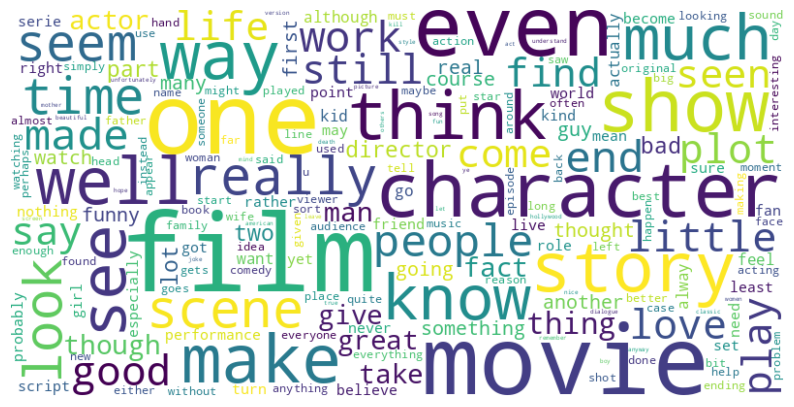

In [ ]:
# wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming data is a pandas DataFrame with a 'review_cleaned' column
text = ' '.join(data['review_cleaned'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)





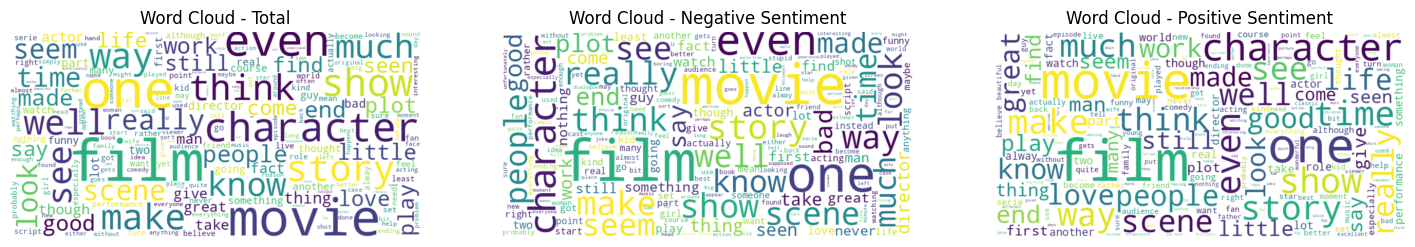

In [ ]:
# Separate data into positive and negative sentiments
negative_data = data[data['sentiment'] == 'negative']
positive_data = data[data['sentiment'] == 'positive']

# Generate word cloud for negative sentiment
negative_text = ' '.join(negative_data['review_cleaned'].astype(str))
wordcloud_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(negative_text)

# Generate word cloud for positive sentiment
positive_text = ' '.join(positive_data['review_cleaned'].astype(str))
wordcloud_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(positive_text)

# Display the generated word clouds using Matplotlib
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud - Total')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.show()